In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.shape

(768, 9)

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<AxesSubplot:>

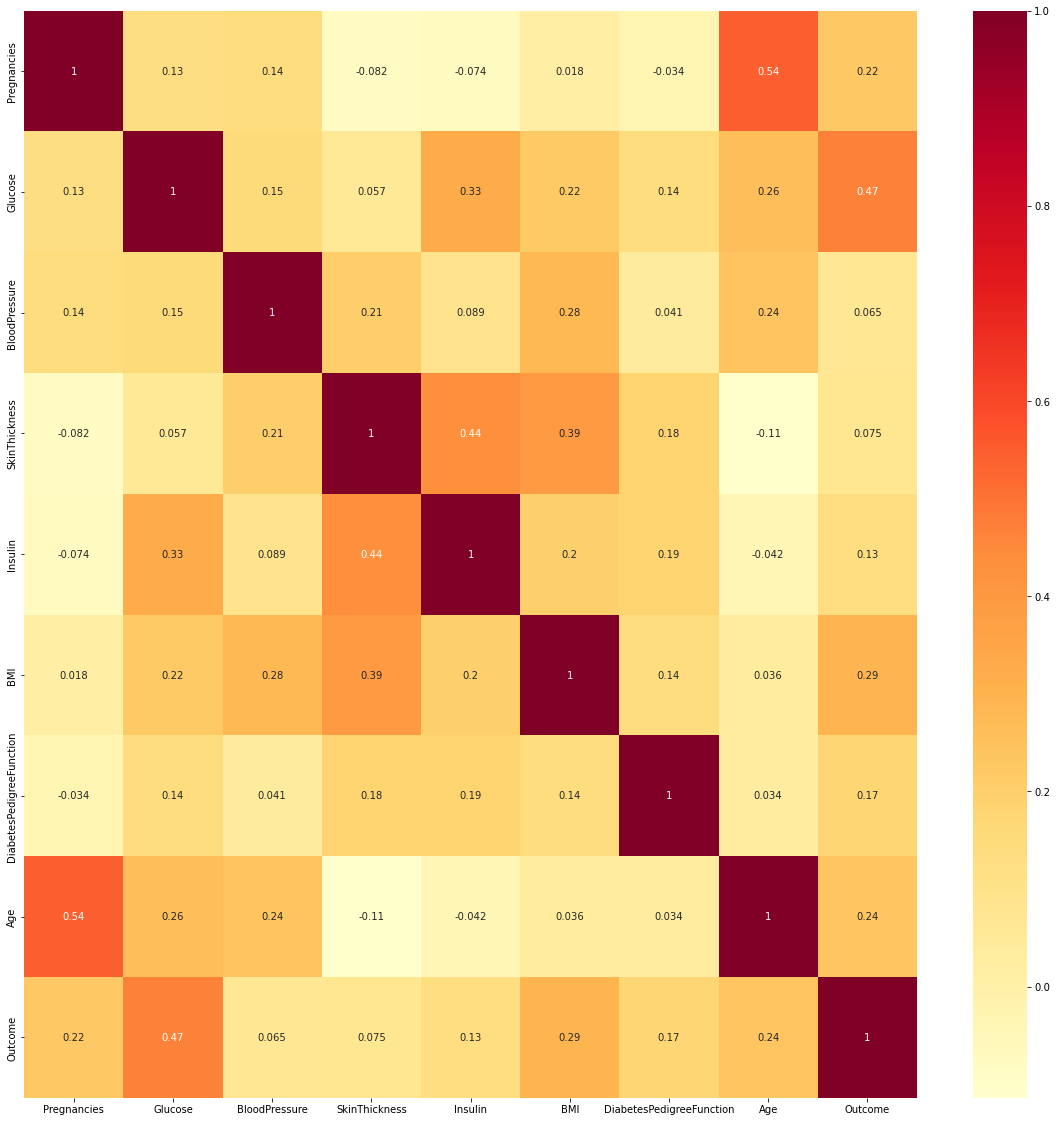

In [8]:
corr = df.corr()
top_corr = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr].corr(), annot=True, cmap='YlOrRd')

Here Glucose and Outcome are highly correlated.

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
True_count = len(df.loc[df['Outcome']==True])
False_count = len(df.loc[df['Outcome']==False])

In [11]:
True_count, False_count

(268, 500)

In [12]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [13]:
X.shape, y.shape

((768, 8), (768,))

In [14]:
scaler = StandardScaler()

In [15]:
Transform_df = scaler.fit_transform(X)

In [16]:
X = Transform_df
y = df['Outcome']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
print('Number of row missing in Glucose: {0}'.format(len(df.loc[df['Glucose']==0])))
print('Number of row missing in BloodPressure: {0}'.format(len(df.loc[df['BloodPressure']==0])))
print('Number of row missing in SkinThickness: {0}'.format(len(df.loc[df['SkinThickness']==0])))
print('Number of row missing in Insulin: {0}'.format(len(df.loc[df['Insulin']==0])))
print('Number of row missing in DiabetesPedigreeFunction: {0}'.format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print('Number of row missing in Age: {0}'.format(len(df.loc[df['Age']==0])))

Number of row missing in Glucose: 5
Number of row missing in BloodPressure: 35
Number of row missing in SkinThickness: 227
Number of row missing in Insulin: 374
Number of row missing in DiabetesPedigreeFunction: 0
Number of row missing in Age: 0


In [20]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values = 0, strategy = 'mean')
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [34]:
n_estimators = [int(x) for x in np.linspace(100,800,10)]
max_features = ["auto", "sqrt", "log2"]
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [2,5,7,10,14]
min_samples_leaf = [1,2,3,5,6]
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 177, 255, 333, 411, 488, 566, 644, 722, 800], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 7, 10, 14], 'min_samples_leaf': [1, 2, 3, 5, 6], 'criterion': ['entropy', 'gini']}


In [ ]:
RF_model = RandomForestClassifier()
RF_model_cv = GridSearchCV(estimator=RF_model,param_grid=random_grid,cv=10,n_jobs=-1,verbose=2)
RF_model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 15000 candidates, totalling 150000 fits


In [22]:
Predict_train = RF_model.predict(X_test)
X_train_acc = accuracy_score(Predict_train, y_test)
X_train_acc

0.7965367965367965

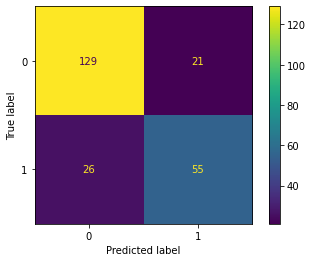

In [23]:
plot_confusion_matrix(RF_model, X_test, y_test)

In [24]:
RF_model.feature_importances_

array([0.09612665, 0.24826466, 0.09014924, 0.06722583, 0.07144871,
       0.14675613, 0.13670987, 0.14331891])

In [25]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
from sklearn.svm import SVC

In [27]:
SVC_model = SVC(kernel='linear')
SVC_model.fit(X_train,y_train)

SVC(kernel='linear')

In [28]:
SVC_prediction = SVC_model.predict(X_test)

In [29]:
SVC_acc = accuracy_score(SVC_prediction, y_test)
SVC_acc

0.8225108225108225

In [30]:
input_data = (0,137,40,35,168,43.1,2.288,33)
np_array = np.asarray(input_data)
Reshape_array = np_array.reshape(1,-1)
std = scaler.transform(Reshape_array)

In [31]:
prediction = SVC_model.predict(std)
prediction

array([1], dtype=int64)

In [32]:
RF_prediction = RF_model.predict(std)
RF_prediction

array([1], dtype=int64)